<a href="https://colab.research.google.com/github/pvanand07/Book-Recommendation-System/blob/master/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install missingno

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Re-loading the datasets
path = "/content/drive/MyDrive/Almabetter/Almabetter Projects/Book Recommender/"
ratings = pd.read_csv(path+'Ratings.csv')
users = pd.read_csv(path+'Users.csv')
books = pd.read_csv(path+'Books.csv')

# # Merging the three datasets: ratings, users, and books

# # Merging ratings with books on 'ISBN'
# ratings_books = pd.merge(ratings, books, on='ISBN', how='left')

# # Merging the above result with users on 'User-ID'
# combined_data = pd.merge(ratings_books, users, on='User-ID', how='left')

# # Display the first few rows of the merged dataframe
# display(combined_data)

<ipython-input-41-b5263f3cd93c>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path+'Books.csv')


Ratings DF

In [58]:
combined_data = pd.merge(pd.merge(ratings, books, on='ISBN', how='left'), users, on='User-ID', how='left')
# Basic info about the combined dataset
print('Combined Data Info:')
combined_data.info()

Combined Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1149780 non-null  int64  
 1   ISBN                 1149780 non-null  object 
 2   Book-Rating          1149780 non-null  int64  
 3   Book-Title           1031136 non-null  object 
 4   Book-Author          1031135 non-null  object 
 5   Year-Of-Publication  1031136 non-null  object 
 6   Publisher            1031134 non-null  object 
 7   Image-URL-S          1031136 non-null  object 
 8   Image-URL-M          1031136 non-null  object 
 9   Image-URL-L          1031132 non-null  object 
 10  Location             1149780 non-null  object 
 11  Age                  840288 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 114.0+ MB


<Axes: >

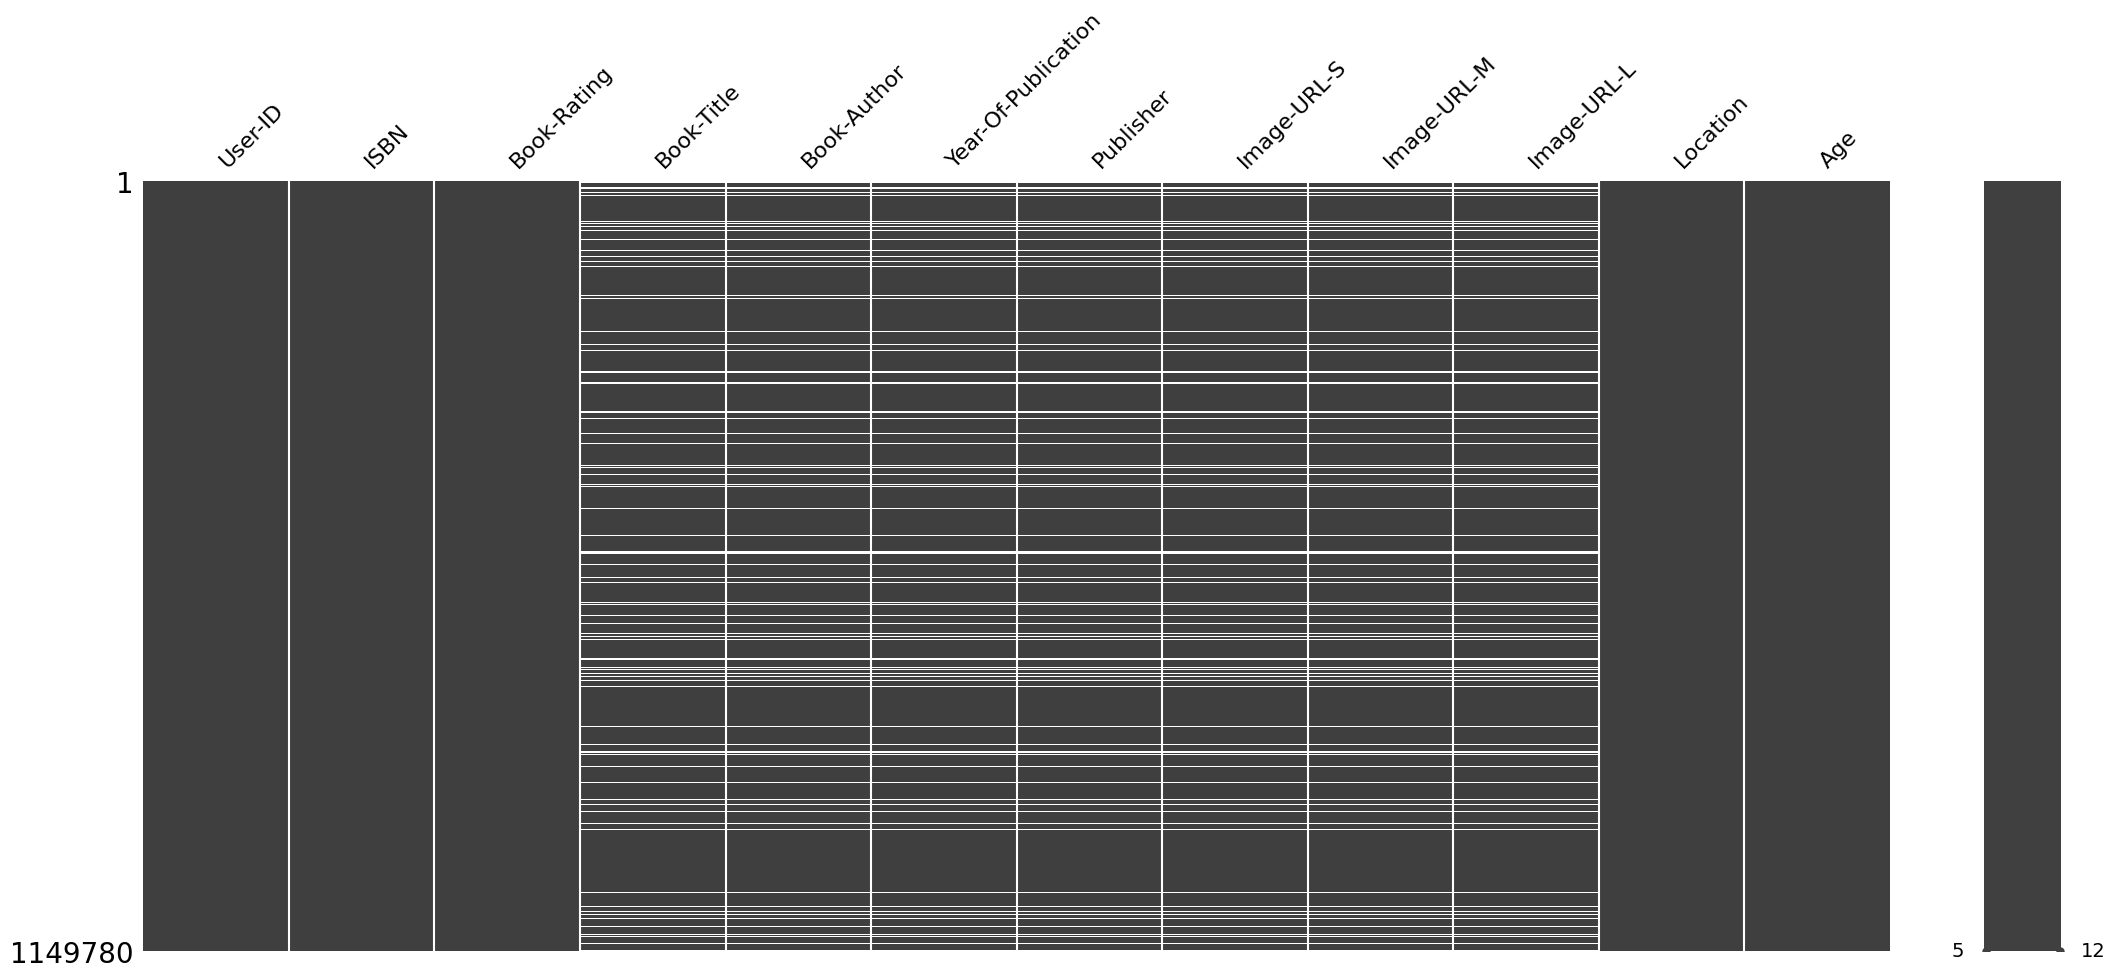

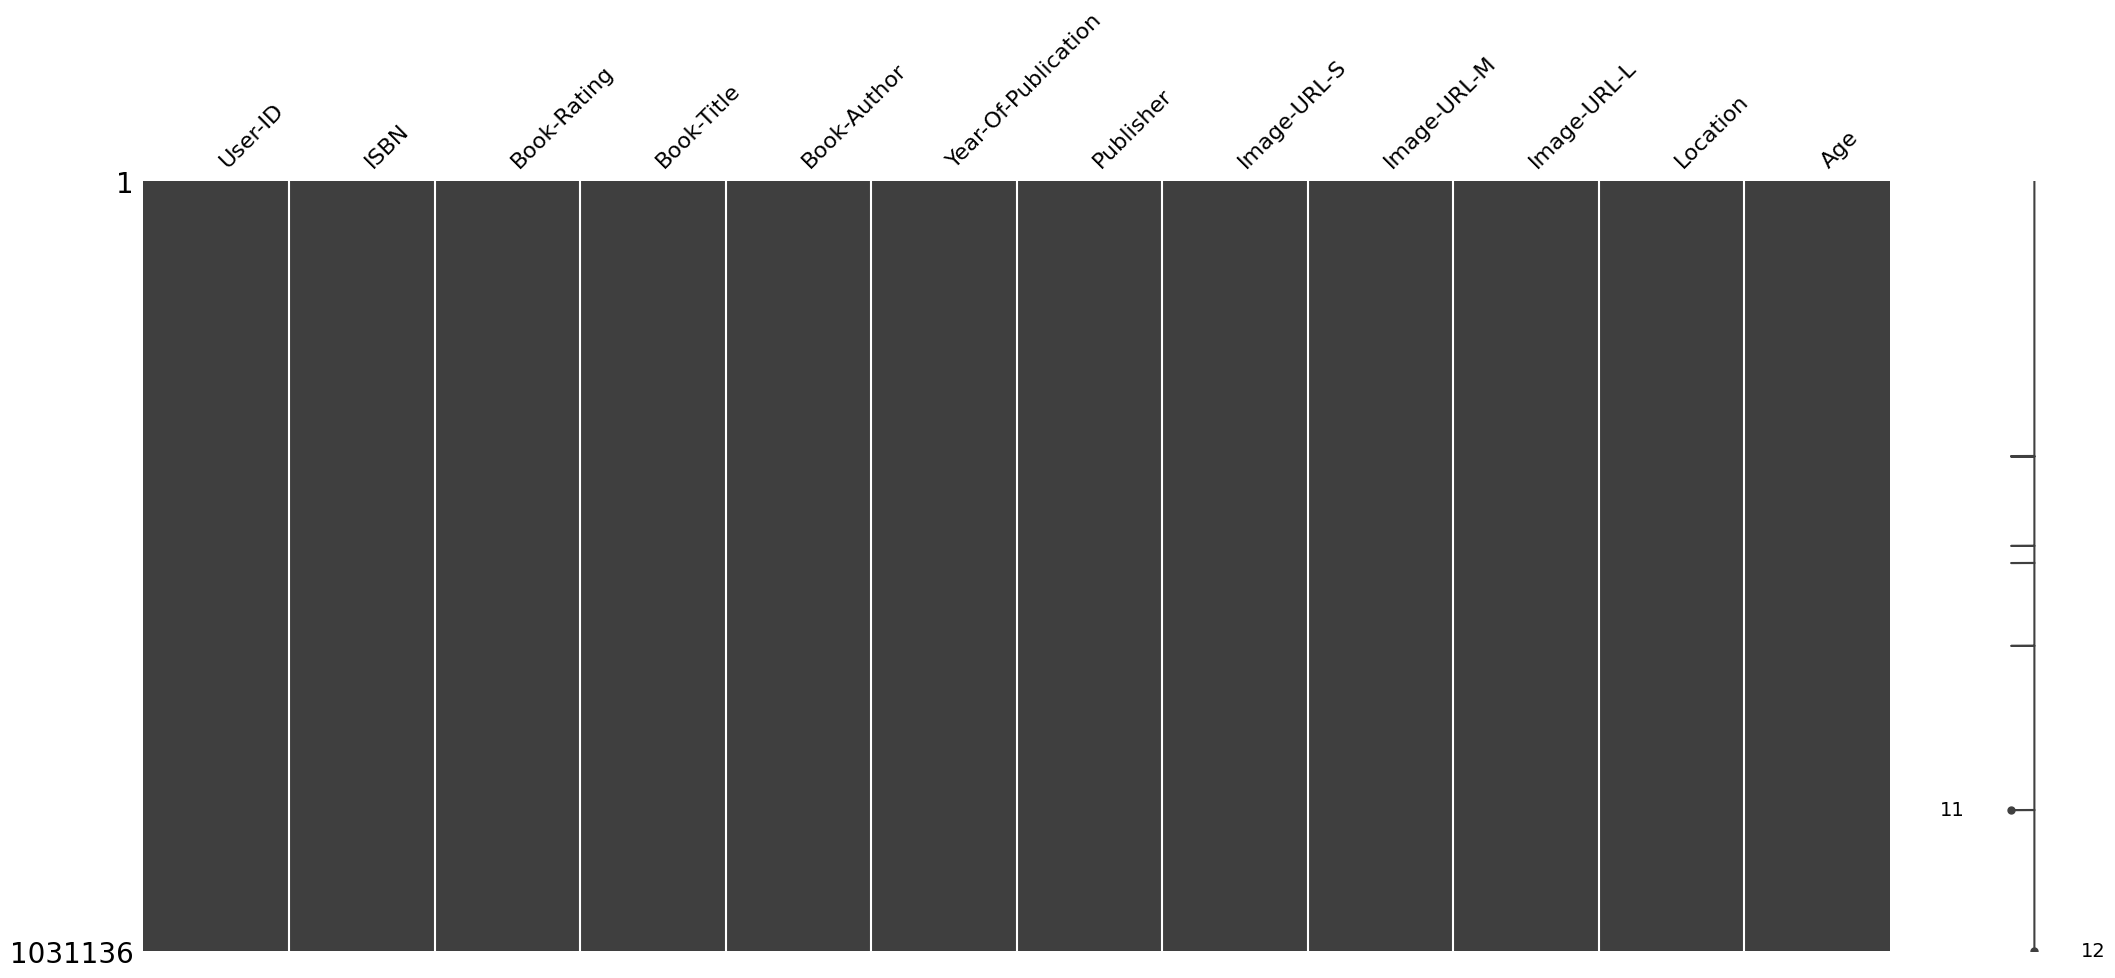

In [61]:
## Cleaning Data for EDA and visualization

# 1. Check for missing values

import missingno as msno
%matplotlib inline
msno.matrix(combined_data)

# Drop missing values in Book Title
combined_data = combined_data[combined_data['Book-Title'].notna()]
msno.matrix(combined_data)

In [34]:
combined_data.shape

(1031136, 12)

In [63]:
combined_data['Age'].isna().sum()/len(combined_data)*100

0.0

## 2. Imputing missing values

we can see that 26.9% of the Age values are missing.

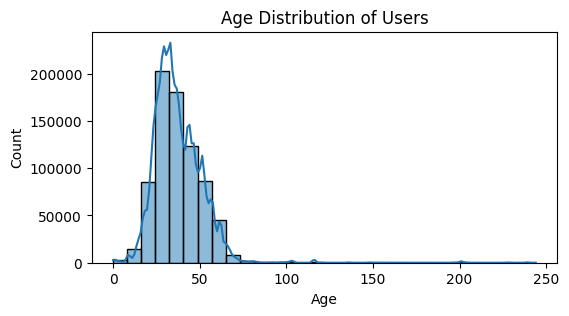

In [44]:
# Age distribution of users
plt.figure(figsize=(6, 3))
sns.histplot(combined_data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

since age distribution is right skewed, we can impute the missing values with the median age.

In [59]:
# Imputing missing values with the median age
median_age = combined_data['Age'].median()
combined_data['Age'].fillna(median_age, inplace=True)

In [60]:
combined_data.isna().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             118644
Book-Author            118645
Year-Of-Publication    118644
Publisher              118646
Image-URL-S            118644
Image-URL-M            118644
Image-URL-L            118648
Location                    0
Age                         0
dtype: int64

We have a few more missing values, which can be dropped

In [62]:
combined_data.dropna(inplace=True)
combined_data.drop_duplicates(inplace=True)
print(combined_data.shape)

(1031129, 12)


In [51]:
display(users)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['User-ID'].plot(kind='hist', bins=20, title='User-ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='User-ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='User-ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['User-ID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('User-ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User-ID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['User-ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'User-ID'}, axis=1)
              .sort_values('User-ID', ascending=True))
  xs = counted['User-ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('User-ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('User-ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['User-ID'].plot(kind='line', figsize=(8, 4), title='User-ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [81]:
## Cleaning Data for EDA and visualization

data = combined_data.copy()
# 1. Converting DataTypes
data['Year-Of-Publication'] = combined_data['Year-Of-Publication'].astype('int')
data['Age'] = combined_data['Age'].astype('int')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1149778
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031129 non-null  int64 
 1   ISBN                 1031129 non-null  object
 2   Book-Rating          1031129 non-null  int64 
 3   Book-Title           1031129 non-null  object
 4   Book-Author          1031129 non-null  object
 5   Year-Of-Publication  1031129 non-null  int64 
 6   Publisher            1031129 non-null  object
 7   Image-URL-S          1031129 non-null  object
 8   Image-URL-M          1031129 non-null  object
 9   Image-URL-L          1031129 non-null  object
 10  Location             1031129 non-null  object
 11  Age                  1031129 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 102.3+ MB


In [79]:
display(combined_data)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",35
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",35
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16
...,...,...,...,...,...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,"cedar park, texas, usa",35
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,"cedar park, texas, usa",35
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,"quebec, quebec, canada",18
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,"mannington, west virginia, usa",38


## Exploratory Data Analysis (EDA) and Data Visualization

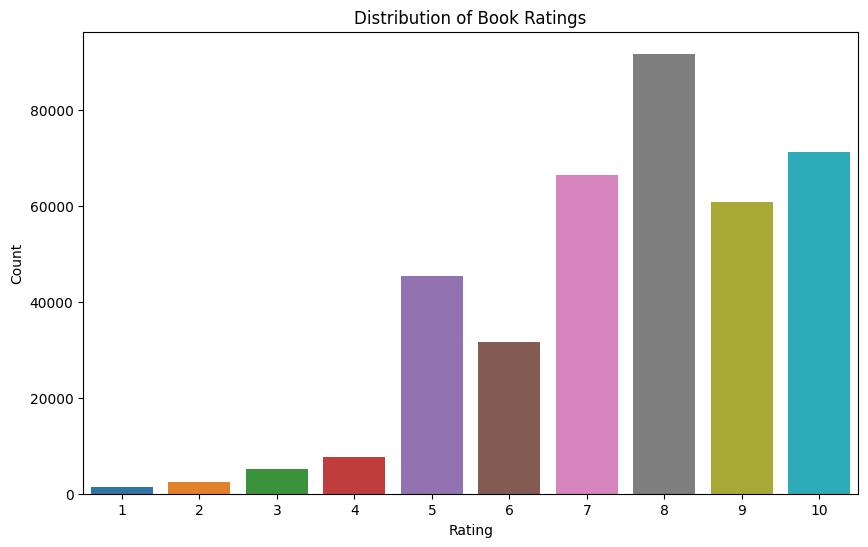

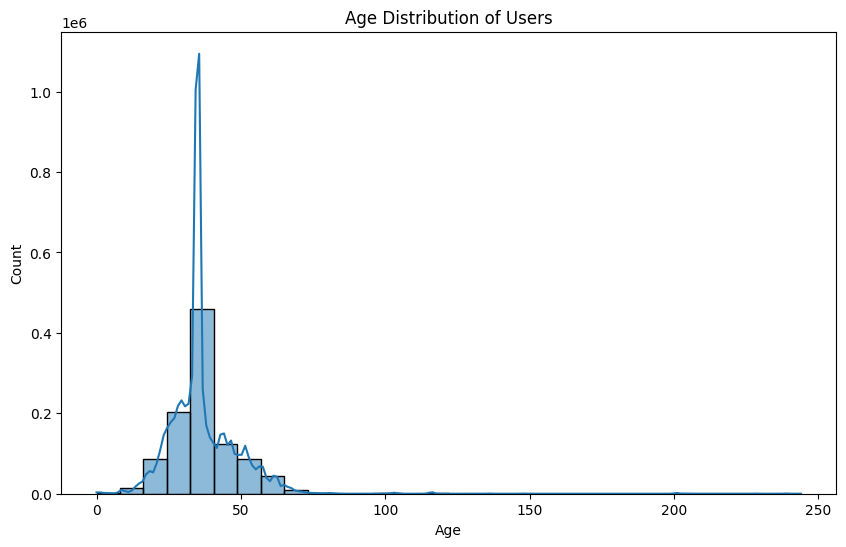

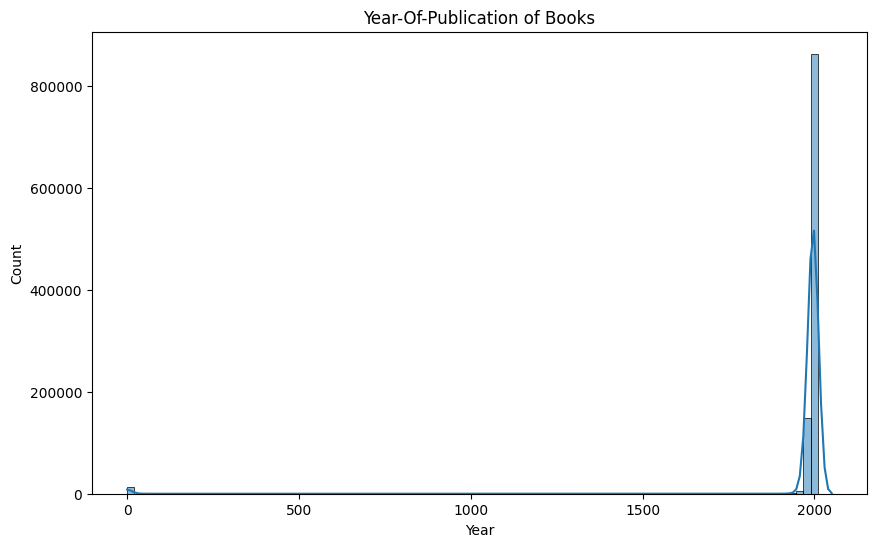

In [87]:

# Distribution of book ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=data[data['Book-Rating'] != 0])
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Age distribution of users
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Year of publication
plt.figure(figsize=(10, 6))
sns.histplot(data['Year-Of-Publication'], bins=100, kde=True)
plt.title('Year-Of-Publication of Books')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

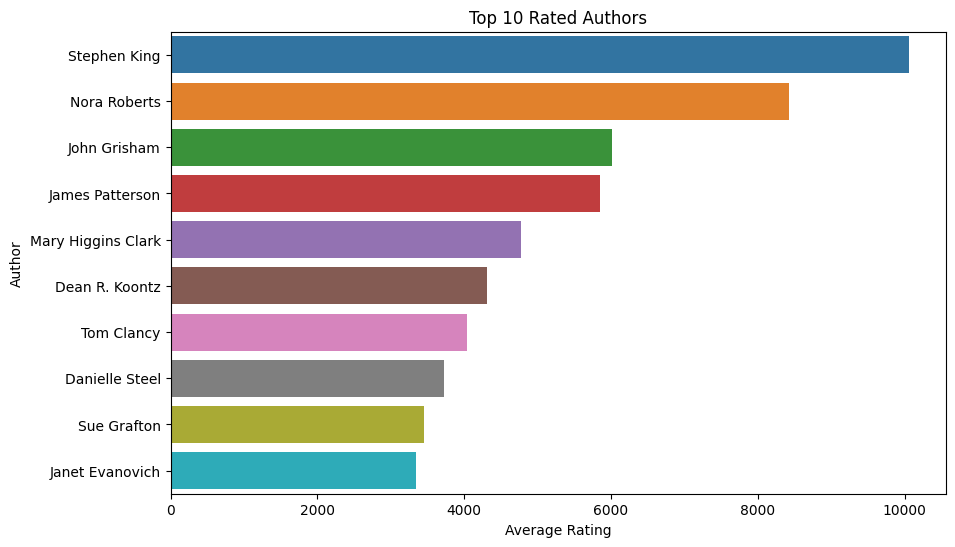

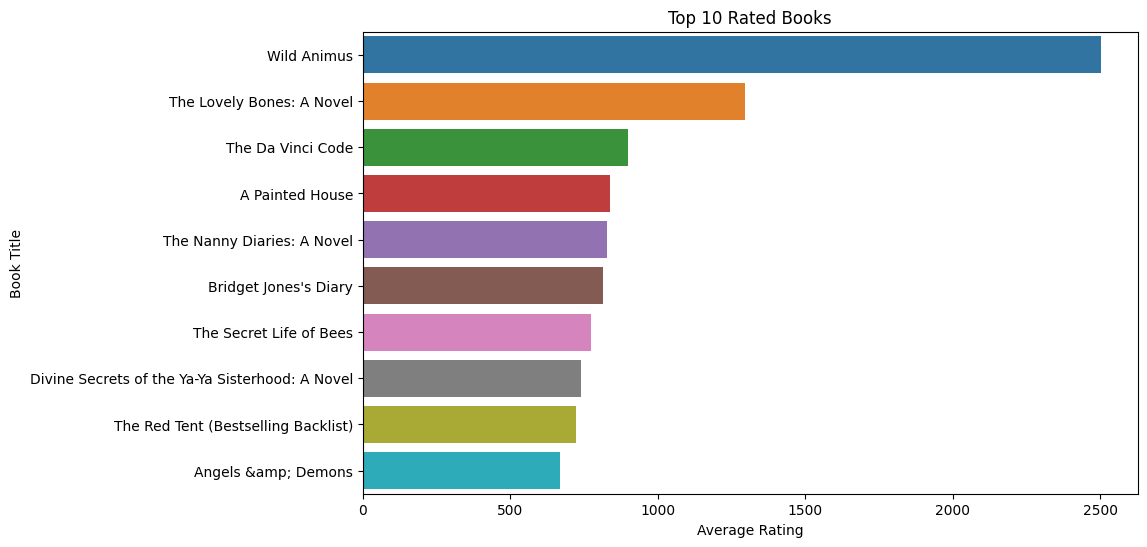

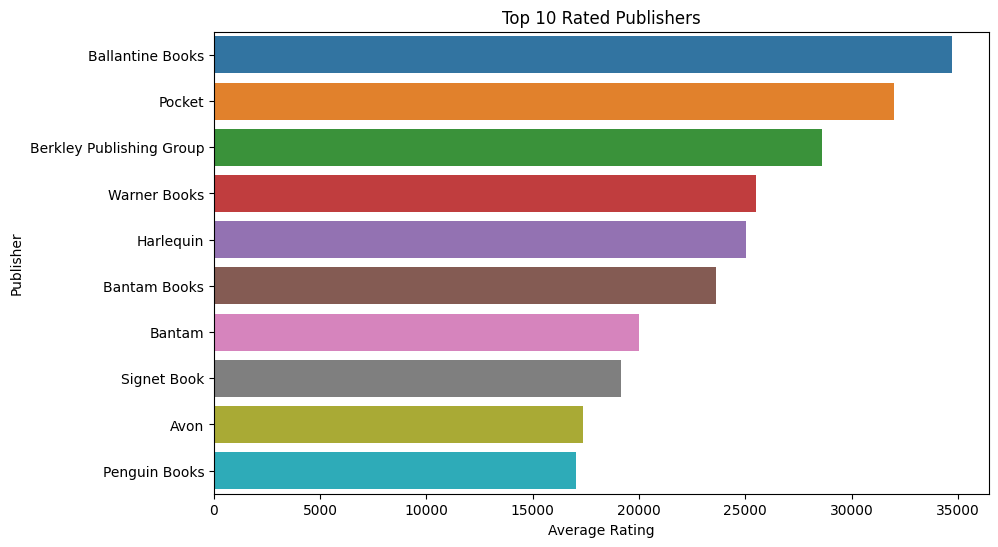

In [85]:
# Top 10 Rated Authors, Books, and Publishers

# Top 10 Rated Authors
top_authors = combined_data.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Rated Authors')
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.show()

# Top 10 Rated Books
top_books = combined_data.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_books.values, y=top_books.index)
plt.title('Top 10 Rated Books')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

# Top 10 Rated Publishers
top_publishers = combined_data.groupby('Publisher')['Book-Rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Rated Publishers')
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.show()

#